In [16]:
# 네이버 웹문서 검색 API
# 인공지능에 대한 웹검색 / 뉴스 / 블로그

import os
import sys
import urllib.request
import pandas as pd
import json
import re
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-white')

client_id = '#########' # 개인 client id
client_secret = '#########' # 개인 client secret

query = urllib.parse.quote(input('검색 질의: '))
idx = 0
display = 100
start = 1
end = 1000

web_df = pd.DataFrame(columns=('Title', 'Link', 'Description'))

for start_idx in range(start, end, display):
    url = 'https://openapi.naver.com/v1/search/webkr?query=' + query + '\\' 
    '&display=' + str(display) + '&start=' + str(start_idx)
    request = urllib.request.Request(url)
    request.add_header('X-Naver-Client-Id', client_id)
    request.add_header('X-Naver-Client-Secret', client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    
    if(rescode == 200):
        response_body = response.read()
        response_dict = json.loads(response_body.decode('utf-8'))
        items = response_dict['items']
        for item_idx in range(0, len(items)):
            remove_tag = re.compile('<.*?>')
            title = re.sub(remove_tag, '', items[item_idx]['title'])
            link = items[item_idx]['link']
            description = re.sub(remove_tag, '', items[item_idx]['description'])
            web_df.loc[idx] = [title, link, description]
            idx += 1
    else:
        print('Error Code: ' + rescode)
        
web_df

C:\Users\user\AppData\Local\Temp\ipykernel_19800\1790489223.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


,Title,Link,Description
0,인공지능 - 위키백과 한국,https://ko.wikipedia.org/wiki/%EC%9D%B8%EA%B3%...,인공지능 (人工智能) 또는 AI ( 영어: artificial intelligenc...
1,"‘인공지능의 대부’, 이제 인공지능을 걱정하다 – Sciencetimes - 사이언...",https://www.sciencetimes.co.kr/news/%EC%9D%B8%...,인공지능(AI) 분야의 대부 힌튼 교수 ; 영국 출신의 제프리 에베레스트 힌튼 교수...
2,인공지능 - 나무위키,https://namu.wiki/w/%EC%9D%B8%EA%B3%B5%EC%A7%8...,인공지능(人工智能) 또는 A.I.(Artificial Intelligence)는 일...
3,인공지능학과 - 나무위키,https://namu.wiki/w/%EC%9D%B8%EA%B3%B5%EC%A7%8...,인공지능학과 / Department of Artificial Intelligence...
4,강인공지능 - 나무위키,https://namu.wiki/w/%EA%B0%95%EC%9D%B8%EA%B3%B...,"Strong AI, True AI 약인공지능(Weak AI)에 대비되는 의미로 만들..."
...,...,...,...
95,그림 인공지능 - 나무위키,https://namu.wiki/w/%EA%B7%B8%EB%A6%BC%20%EC%9...,이미지 인공지능(AI Image Generator)은 인공지능을 활용해 이미지 작업...
96,약인공지능 - 나무위키,https://namu.wiki/w/%EC%95%BD%EC%9D%B8%EA%B3%B...,Weak AI 약한 인공지능은 사진에서 물체를 찾거나 소리를 듣고 상황을 파악하는 ...
97,"인공지능은 어떻게 발달해왔는가, 인공지능의 역사 | 인사이트리포트 | 삼성SDS",https://www.samsungsds.com/kr/insights/091517_...,딥러닝의 등장 이후 인공지능은 빠른 발전을 보이고 있습니다만 2018년 어떤 기술이...
98,인공지능과 빅데이터 관계 - 모두의연구소,https://modulabs.co.kr/blog/ai-bigdata/,인공지능과 빅데이터가 서로 어떤 관계에 있는지? 빅데이터가 가지고 있는 특징에 대해...


In [17]:
web = []
for d in web_df.Description:
    web.append(d)
    
print(web[:5])

['인공지능 (人工智能) 또는 AI ( 영어: artificial intelligence, AI )는 인간의 학습능력, 추론능력, 지각능력을 인공적으로 구현하려는 컴퓨터 과학의 세부분야 중 하나이다. 정보공학 분야에 있어 하나의 인프라 기술이기도 하다. 인간을 포함한 동물이 갖고 있는 지능 즉, natural intelligence와는 다른 개념...', '인공지능(AI) 분야의 대부 힌튼 교수 ; 영국 출신의 제프리 에베레스트 힌튼 교수(Prof. Geoffrey Everest Hinton)는 인지심리학자로 1980년부터 이미 수많은 알고리즘을 개발하며 딥러닝 분야를 이끈 ‘인공지능(AI) 분야의 대부’로 불린다. 힌튼 교수는 그가 대학생이던 1972년 데이터를 분석하여 기술을 ...', '인공지능(人工智能) 또는 A.I.(Artificial Intelligence)는 일반적으로 인간의 학습능력, 추론능력, 지각능력이 필요한 작업을 할 수 있도록 컴퓨터시스템을 구현하려는 컴퓨터과학의 세부분야 중 하나이다. 인간을 포함한 동물이 갖고 있는 지능 즉, natural intelligence와는 다른 개념이다.', '인공지능학과 / Department of Artificial Intelligence 컴퓨터과학 및 컴퓨터공학 분야에서 인공지능을 중점으로 공부하는 학과.', 'Strong AI, True AI 약인공지능(Weak AI)에 대비되는 의미로 만들어진 용어이다. 약인공지능은 어떤 특정한 한 가지 분야의 주어진 일을 인간의 지시에 따라 수행하는 인공지능을 말하는데 이러한 약인공지능의 제한된 기능을 뛰어넘어 더 발달된 인공지능이 바로 강인공지능이다.']


In [18]:
# 형태소 분석을 이용한 명사 추출

# 불용어 사전
# 불용어 예제 : 인공지능 인공 지능 분야 수 것 등 기반 일 년 말 문 월 이 명 깨 개 중 범 부 딥 빅 책 분 봉 차 나 대 전 억 대 형 선 사 폼 원 번
stop_words = '인공지능 인공 지능 분야 수 것 등 기반 일 년 말 문 월 이 명 깨 개 중 범 부 딥 빅 책 분 봉 차 나 대 전 억 대 형 선 사 폼 원 번'
stop_words = stop_words.split(' ')
print(stop_words)

['인공지능', '인공', '지능', '분야', '수', '것', '등', '기반', '일', '년', '말', '문', '월', '이', '명', '깨', '개', '중', '범', '부', '딥', '빅', '책', '분', '봉', '차', '나', '대', '전', '억', '대', '형', '선', '사', '폼', '원', '번']


In [19]:
from konlpy.tag import Mecab
tagger = Mecab(r'C:\mecab\mecab-ko-dic')

web_nouns = []
for w in web:
    for noun in tagger.nouns(w):
        if noun not in stop_words:
            web_nouns.append(noun)
            
web_nouns[:10]

['人工', '智', '能', '영어', '인간', '학습', '능력', '추론', '능력', '지각']

In [7]:
# 단어 빈도수 측정
from collections import Counter

web_nouns_counter = Counter(web_nouns)
top_web_nouns = dict(web_nouns_counter.most_common(100))
top_web_nouns

{'인간': 90,
 '컴퓨터': 70,
 '능력': 60,
 '기술': 60,
 '데이터': 50,
 '학습': 30,
 '과학': 30,
 '하나': 30,
 '힌튼': 30,
 '교수': 30,
 '러닝': 30,
 '시스템': 30,
 '활용': 30,
 '목표': 30,
 '人工': 20,
 '智': 20,
 '能': 20,
 '추론': 20,
 '지각': 20,
 '구현': 20,
 '세부': 20,
 '공학': 20,
 '포함': 20,
 '동물': 20,
 '개념': 20,
 '대부': 20,
 '분석': 20,
 '작업': 20,
 '학과': 20,
 '중점': 20,
 '약': 20,
 '수행': 20,
 '이미지': 20,
 '처리': 20,
 '기계': 20,
 '관계': 20,
 '대화': 20,
 '서비스': 20,
 '비서': 20,
 '영어': 10,
 '정보': 10,
 '인프라': 10,
 '영국': 10,
 '출신': 10,
 '제프리': 10,
 '에베레스트': 10,
 '인지': 10,
 '심리학자': 10,
 '알고리즘': 10,
 '개발': 10,
 '그': 10,
 '대학': 10,
 '일반': 10,
 '필요': 10,
 '공부': 10,
 '대비': 10,
 '의미': 10,
 '용어': 10,
 '특정': 10,
 '가지': 10,
 '지시': 10,
 '제한': 10,
 '기능': 10,
 '발달': 10,
 '강': 10,
 '소프트웨어': 10,
 '사진': 10,
 '물체': 10,
 '소리': 10,
 '상황': 10,
 '파악': 10,
 '기존': 10,
 '해결': 10,
 '각종': 10,
 '문제': 10,
 '현실': 10,
 '실용': 10,
 '등장': 10,
 '이후': 10,
 '발전': 10,
 '화두': 10,
 '예측': 10,
 '정도': 10,
 '변화': 10,
 '산업': 10,
 '적용': 10,
 '가동': 10,
 '중지': 10,
 '예방': 10,
 '의사': 10

In [20]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
from matplotlib import rc

font_path = 'C:\\Windows\\Fonts\\HancomUljuBangudaePetroglyph.ttf'
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

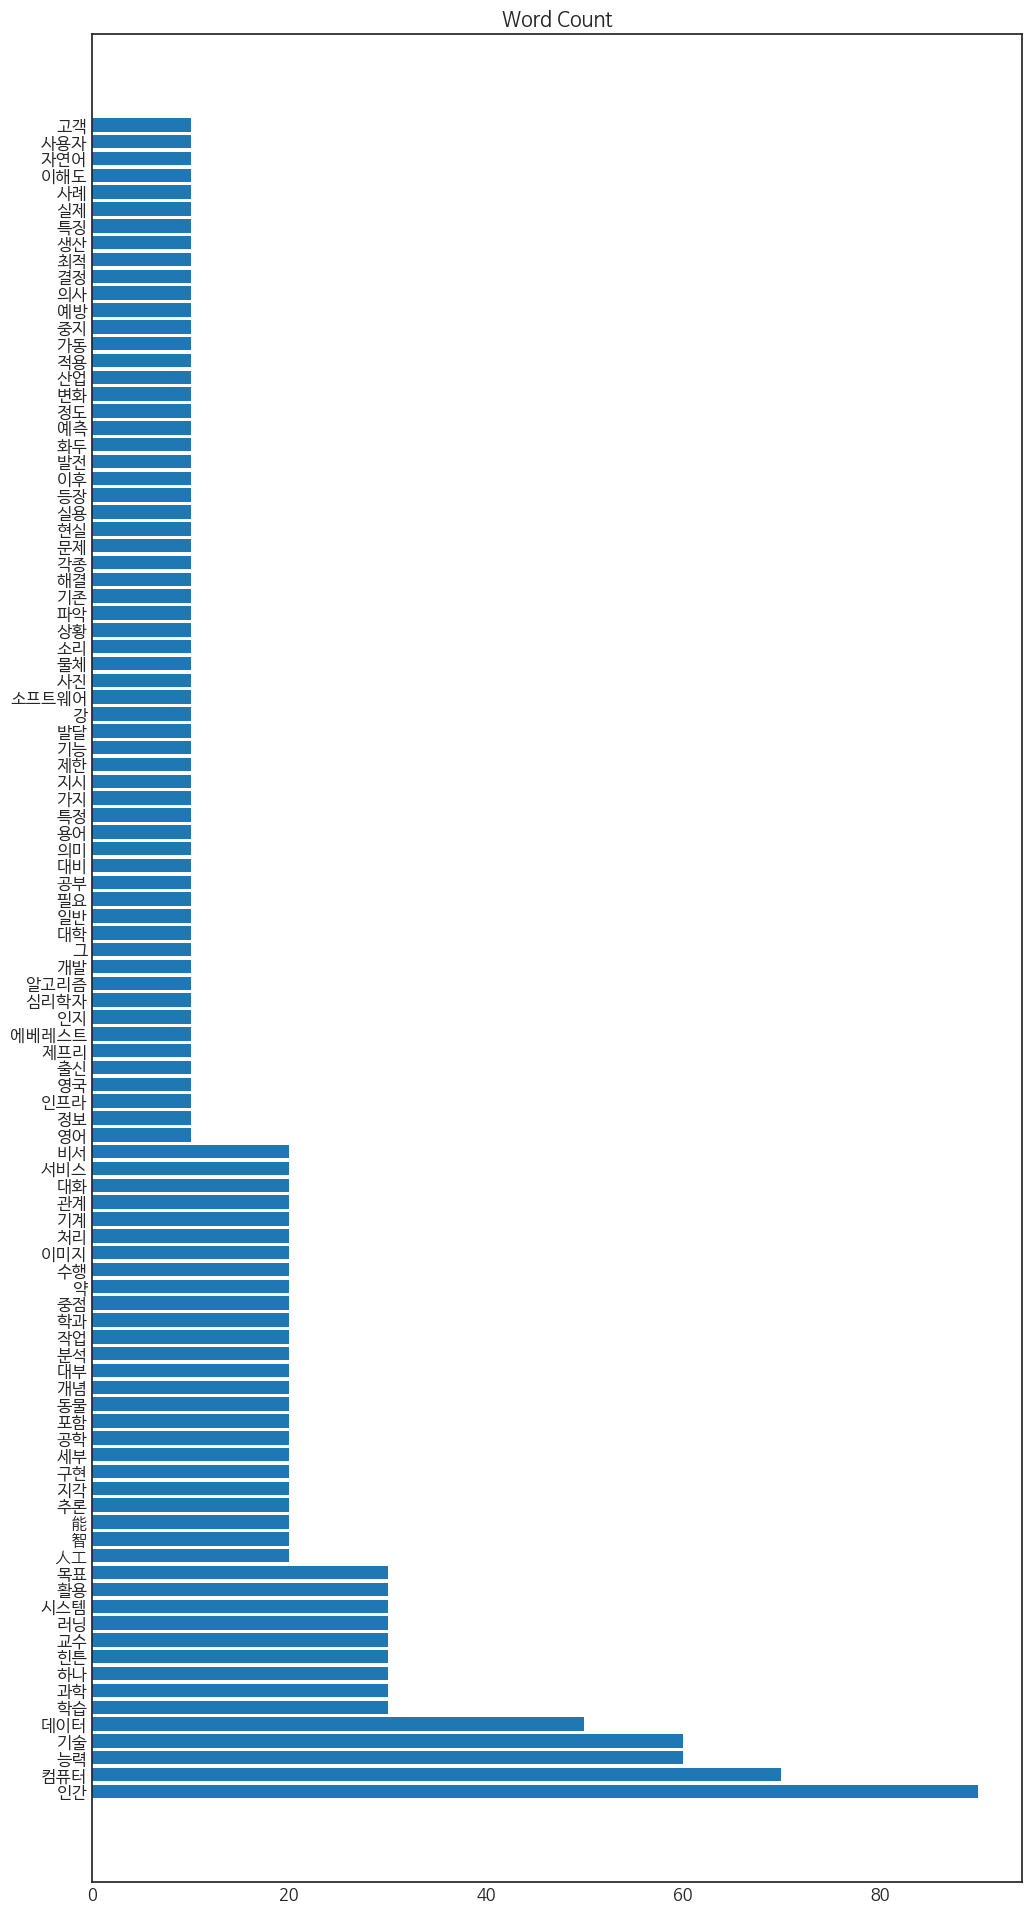

In [38]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
from matplotlib import rc

font_path = 'C:\\Windows\\Fonts\\Hancom Gothic Bold.ttf'

font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 단어 빈도 시각화
import numpy as np
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_web_nouns))

plt.figure(figsize=(12,24))
plt.barh(y_pos, top_web_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_web_nouns.keys())
plt.show()


<Axes: >

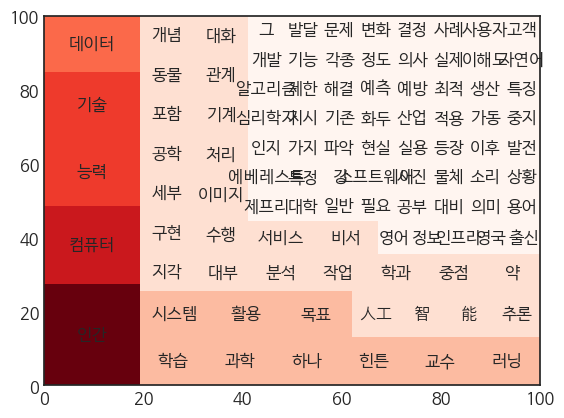

In [39]:
# 트리맵 시각화
import squarify

norm = mpl.colors.Normalize(vmin=min(top_web_nouns.values()),
                            vmax=max(top_web_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_web_nouns.values()]

squarify.plot(label=top_web_nouns.keys(),
              sizes=top_web_nouns.values(),
              color=colors)

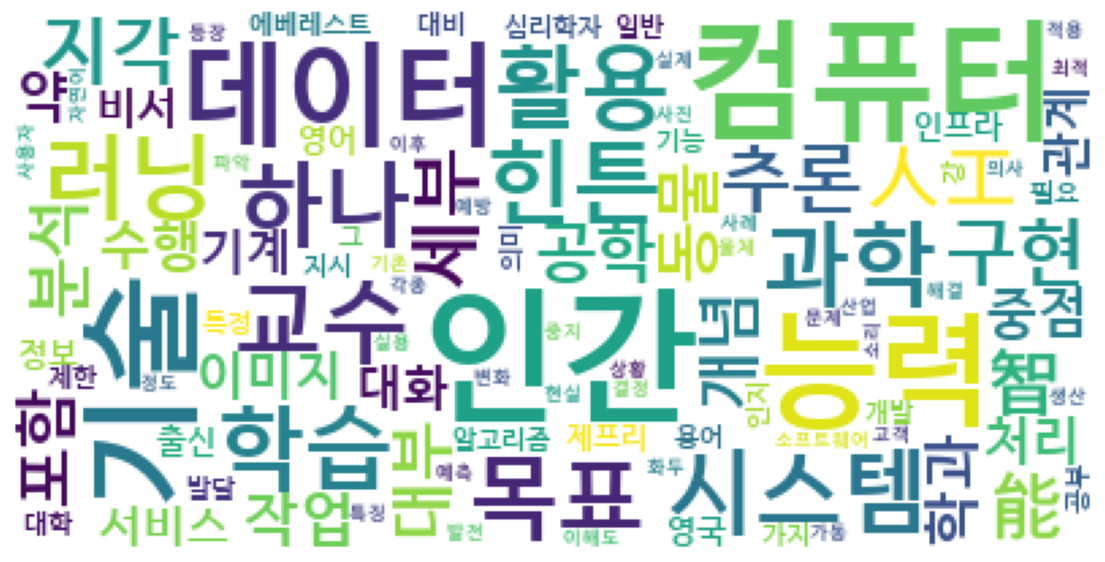

In [41]:
# 워드 클라우드 시각화
# 인공지능 웹문서에 나온 키워드 워드클라우드 시각화
from wordcloud import WordCloud

wc = WordCloud(background_color = 'white', font_path='C:\\Windows\\Fonts\\Hancom Gothic Bold.ttf')

wc.generate_from_frequencies(top_web_nouns)

figure = plt.figure(figsize=(14, 14))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

In [42]:
# 네이버 뉴스 키워드 분석
# 네이버 뉴스 검색 API

# 네이버 웹문서 검색 API

import os
import sys
import urllib.request
import pandas as pd
import numpy as np
import json
import re
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-white')

client_id = '#########' # 개인 client id
client_secret = '#########' # 개인 client secret

query = urllib.parse.quote(input('검색 질의: '))
idx = 0
display = 100
start = 1
end = 1000
sort = 'sim'

news_df = pd.DataFrame(columns=('Title', 'Original Link', 'Link', 'Description', 'Publication Date'))

for start_idx in range(start, end, display):
    url = 'https://openapi.naver.com/v1/search/news?query=' + query + '\\' 
    '&display=' + str(display) + '&start=' + str(start_idx) + '&sort=' + sort
    request = urllib.request.Request(url)
    request.add_header('X-Naver-Client-Id', client_id)
    request.add_header('X-Naver-Client-Secret', client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    
    if(rescode == 200):
        response_body = response.read()
        response_dict = json.loads(response_body.decode('utf-8'))
        items = response_dict['items']
        for item_idx in range(0, len(items)):
            remove_tag = re.compile('<.*?>')
            title = re.sub(remove_tag, '', items[item_idx]['title'])
            original_link = items[item_idx]['originallink']
            link = items[item_idx]['link']
            description = re.sub(remove_tag, '', items[item_idx]['description'])
            pub_date = items[item_idx]['pubDate']
            news_df.loc[idx] = [title, original_link, link, description, pub_date]
            idx += 1
    else:
        print('Error Code: ' + rescode)
        
news_df

C:\Users\user\AppData\Local\Temp\ipykernel_19800\3628317499.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


,Title,Original Link,Link,Description,Publication Date
0,"식약처, 망막질환 진단보조 소프트웨어 혁신의료기기 지정",https://www.yna.co.kr/view/AKR2023072408660001...,https://n.news.naver.com/mnews/article/001/001...,"위스키는 부산대병원·부산대기술지주의 자회사인 에이아이인사이트가 개발한 제품으로, 인...","Mon, 24 Jul 2023 13:54:00 +0900"
1,"기업 이메일 노리는 생성 AI, 웜GPT(WormGPT) 등장",https://www.cctvnews.co.kr/news/articleView.ht...,https://www.cctvnews.co.kr/news/articleView.ht...,사이버 보안 기업 SlashNext가 웜GPT(WormGPT)라는 새로운 인공지능(...,"Mon, 24 Jul 2023 13:54:00 +0900"
2,바이오텍 웨비나 개최,http://www.koreatimes.com/article/1474358,http://www.koreatimes.com/article/1474358,웨비나 주제는 ‘인공지능의 헬스케어 분야 적용: 한국 바이오텍 생태계의 최근 동향 ...,"Mon, 24 Jul 2023 13:54:00 +0900"
3,"위세아이텍, 방송대 &apos;빅데이터 활용 AI 학습분석 서비스&apos; 오픈",https://www.etnews.com/20230724000188,https://n.news.naver.com/mnews/article/030/000...,인공지능(AI)·빅데이터 전문기업 위세아이텍(대표 김다산·이제동)은 한국방송통신대학...,"Mon, 24 Jul 2023 13:54:00 +0900"
4,하반기 IPO 최대어 &apos;파두&apos; 출사표…&quot;글로벌 데이터센터...,http://www.sentv.co.kr/news/view/663324,http://www.sentv.co.kr/news/view/663324,"특히, 인공지능(AI), 자율주행, 빅데이터 등이 화두로 떠오르며 고성능 컨트롤러 ...","Mon, 24 Jul 2023 13:54:00 +0900"
...,...,...,...,...,...
95,오아시스마켓 상장철회에도 &apos;장밋빛&apos; 전망,http://www.kbiznews.co.kr/news/articleView.htm...,http://www.kbiznews.co.kr/news/articleView.htm...,오아시스가 준비 중인 무인 자동화 매장은 360도 인공지능(AI) 카메라가 상품을 ...,"Mon, 24 Jul 2023 13:54:00 +0900"
96,"KT, 대전소방본부에 ‘차선 구분’ 초정밀 측위 솔루션 공급",http://www.dizzotv.com/site/data/html_dir/2023...,http://www.dizzotv.com/site/data/html_dir/2023...,KT는 인공지능(AI)이 GPS 오차를 보정하는 플랫폼과 초정밀 측위 솔루션이 적용...,"Mon, 24 Jul 2023 13:52:00 +0900"
97,"특허청, 인공지능 발명가 인정 국민의견 듣는다",http://www.chungnamilbo.co.kr/news/articleView...,http://www.chungnamilbo.co.kr/news/articleView...,특허청이 인공지능 발명자 인정 관련 대국민 설문 조사를 오는 9월 30일까지 실시한...,"Mon, 24 Jul 2023 13:52:00 +0900"
98,"식약처, 망막질환 진단보조 SW &apos;위스키&apos;...혁신의료기기 지정",http://www.goodkyung.com/news/articleView.html...,http://www.goodkyung.com/news/articleView.html...,WISKY(위스키)는 AI(인공지능) 기술로 안저영상을 분석해 실명으로 이어질 수 ...,"Mon, 24 Jul 2023 13:52:00 +0900"


In [43]:
news = []
for n in news_df.Title:
    news.append(n)
    
print(news[:5])

['식약처, 망막질환 진단보조 소프트웨어 혁신의료기기 지정', '기업 이메일 노리는 생성 AI, 웜GPT(WormGPT) 등장', '바이오텍 웨비나 개최', '위세아이텍, 방송대 &apos;빅데이터 활용 AI 학습분석 서비스&apos; 오픈', '하반기 IPO 최대어 &apos;파두&apos; 출사표…&quot;글로벌 데이터센터 선도한다&quot;']


In [44]:
# 형태소 분석을 이용한 명사추출

from konlpy.tag import Mecab
tagger = Mecab(r'C:\mecab\mecab-ko-dic')

news_nouns = []
for n in news:
    for noun in tagger.nouns(n):
        if noun not in stop_words:
            news_nouns.append(noun)
            
news_nouns[:10]

['식', '약', '처', '망막', '질환', '진단', '보조', '소프트웨어', '혁신', '의료']

In [45]:
news_nouns_counter = Counter(news_nouns)
top_news_nouns = dict(news_nouns_counter.most_common(100))
top_news_nouns

{'식': 20,
 '약': 20,
 '처': 20,
 '망막': 20,
 '질환': 20,
 '진단': 20,
 '보조': 20,
 '혁신': 20,
 '의료': 20,
 '기기': 20,
 '지정': 20,
 '텍': 20,
 '데이터': 20,
 '소프트웨어': 10,
 '기업': 10,
 '이메일': 10,
 '웜': 10,
 '등장': 10,
 '바이오': 10,
 '웨비': 10,
 '개최': 10,
 '위세': 10,
 '아이': 10,
 '방송': 10,
 '활용': 10,
 '학습': 10,
 '분석': 10,
 '서비스': 10,
 '오픈': 10,
 '하반기': 10,
 '대어': 10,
 '파두': 10,
 '출사표': 10,
 '글로벌': 10,
 '센터': 10,
 '선도': 10,
 '오아시스': 10,
 '마켓': 10,
 '상장': 10,
 '철회': 10,
 '장밋빛': 10,
 '전망': 10,
 '대전': 10,
 '소방본부': 10,
 '차선': 10,
 '구분': 10,
 '정밀': 10,
 '측위': 10,
 '솔루션': 10,
 '공급': 10,
 '특허청': 10,
 '발명가': 10,
 '인정': 10,
 '국민': 10,
 '의견': 10,
 '위스키': 10,
 '앤드류': 10,
 '박사': 10,
 '금융': 10,
 '특강': 10,
 '서': 10,
 '금융업': 10,
 '유통': 10,
 '업과': 10,
 '시너지': 10,
 '가능': 10}

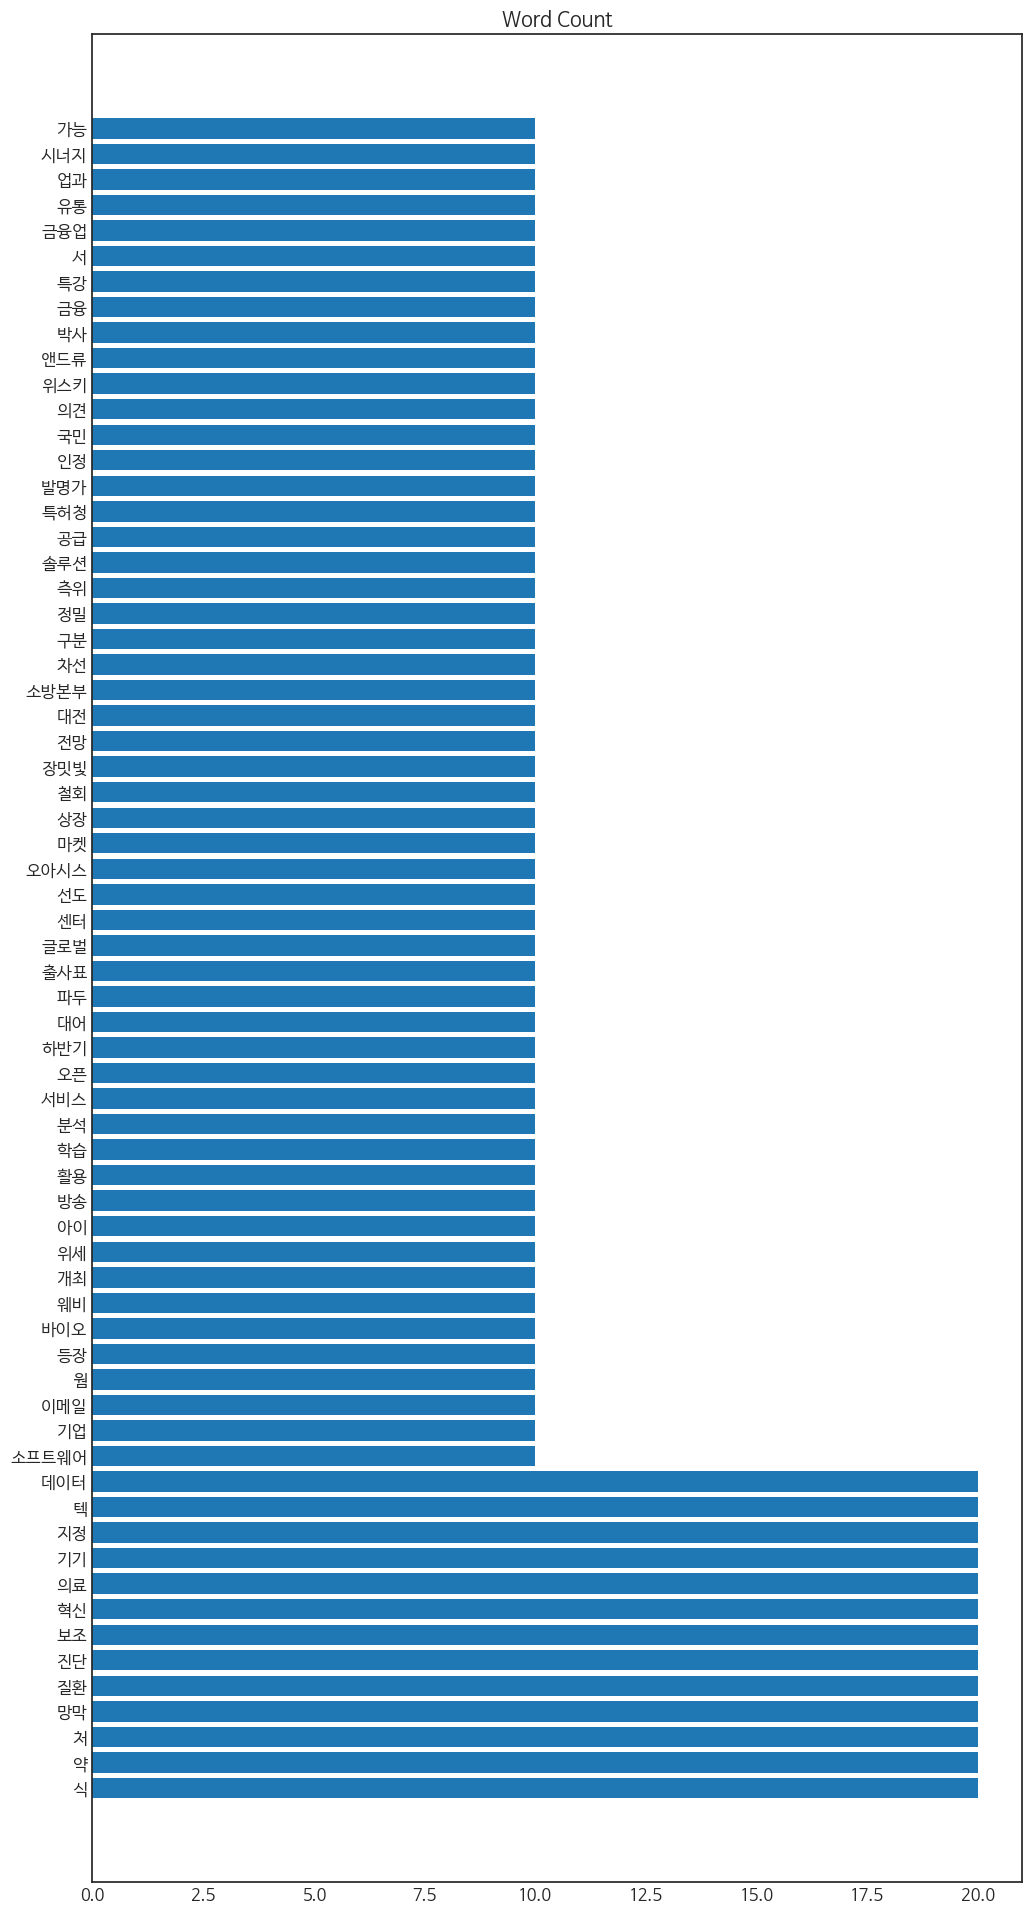

In [48]:
# 단어빈도 시각화

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')

font_path = 'C:\\Windows\\Fonts\\Hancom Gothic Bold.ttf'

font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_news_nouns))

plt.figure(figsize=(12,24))
plt.barh(y_pos, top_news_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_news_nouns.keys())
plt.show()


<Axes: >

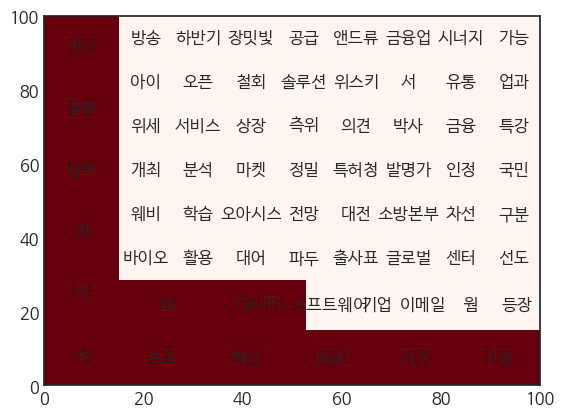

In [50]:
# 트리맵 시각화

norm = mpl.colors.Normalize(vmin=min(top_news_nouns.values()),
                            vmax=max(top_news_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_news_nouns.values()]

squarify.plot(label=top_news_nouns.keys(),
              sizes=top_news_nouns.values(),
              color=colors)

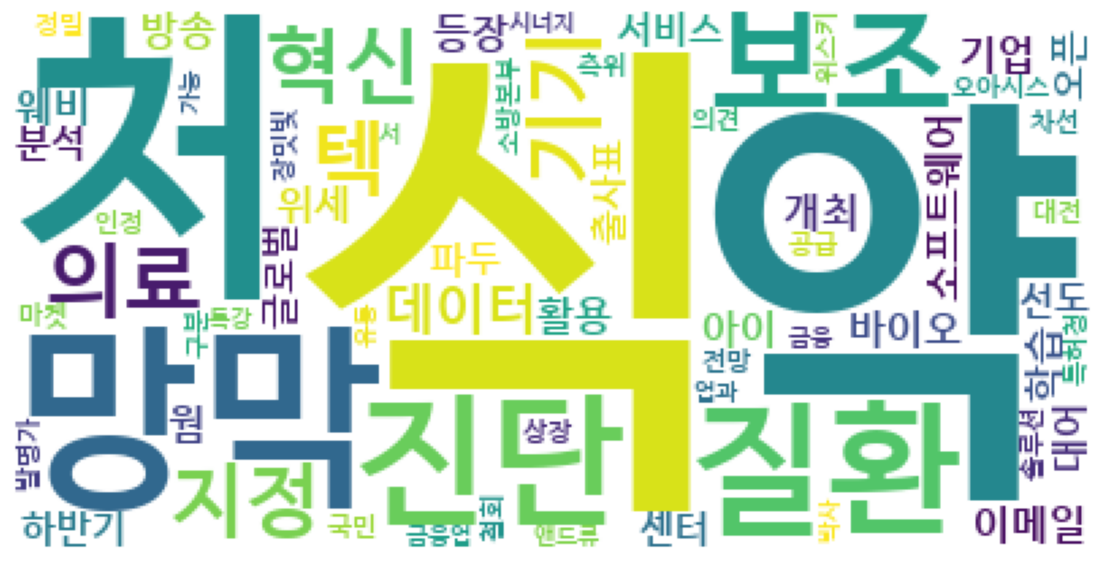

In [49]:
# 워드 클라우드 시각화
# 인공지능 뉴스에 나온 키워드 워드클라우드 시각화

wc = WordCloud(background_color = 'white', font_path='C:\\Windows\\Fonts\\Hancom Gothic Bold.ttf')

wc.generate_from_frequencies(top_news_nouns)

figure = plt.figure(figsize=(14, 14))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

In [54]:
client_id = '#########' # 개인 client id
client_secret = '#########' # 개인 client secret

query = urllib.parse.quote(input('검색 질의: '))
idx = 0
display = 100
start = 1
end = 1000
sort = 'sim'

blog_df = pd.DataFrame(columns=('Title', 'Link', 'Description', 'Blogger Name', 'Blogger Link'))

for start_idx in range(start, end, display):
    url = 'https://openapi.naver.com/v1/search/blog?query=' + query + '\\' 
    '&display=' + str(display) + '&start=' + str(start_idx) + '&sort=' + sort
    request = urllib.request.Request(url)
    request.add_header('X-Naver-Client-Id', client_id)
    request.add_header('X-Naver-Client-Secret', client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    
    if(rescode == 200):
        response_body = response.read()
        response_dict = json.loads(response_body.decode('utf-8'))
        items = response_dict['items']
        for item_idx in range(0, len(items)):
            remove_tag = re.compile('<.*?>')
            title = re.sub(remove_tag, '', items[item_idx]['title'])
            link = items[item_idx]['link']
            description = re.sub(remove_tag, '', items[item_idx]['description'])
            blogger_name = items[item_idx]['bloggername']
            blogger_link = items[item_idx]['bloggerlink']
            blog_df.loc[idx] = [title, link, description, blogger_name, blogger_link]
            idx += 1
    else:
        print('Error Code: ' + rescode)
        
blog_df

,Title,Link,Description,Blogger Name,Blogger Link
0,인공지능에 기반한 신약개발 관련 기업들에 대한 생각,https://blog.naver.com/hardark/223155189732,이 글에서는 그동안 단편적으로 언급했던 인공지능에 기반한 신약개발 바이오 기업들에 ...,경제적 여유만큼 정신적 여유를,blog.naver.com/hardark
1,챗GPT와 이야기하다[&apos;인공지능 전문가가 알려주는 챗 GPT로...,https://blog.naver.com/honeness/223162851783,"오픈 AI는 2015년에 설립된 인공지능 연구 기업이었는데, 구글이나 페이스북 같은...",풍경소리,blog.naver.com/honeness
2,아이큐코인 전망 및 시세와 인공지능 관련 특징,https://blog.naver.com/howgkdn/223159809042,chatGPT와 같은 인공지능 플랫폼은 최대한 많은 데이터 학습이 필요하고 데이터를...,해외주식과 잡동사니 공간,blog.naver.com/howgkdn
3,인공지능(AI)이 인간의 일자리를 감소시킬 것인가?,https://blog.naver.com/rsupport/223155434218,인공지능이 인간의 일자리를 대체? 이 질문은 최근에 사람들의 관심을 끌며 치열한 논...,알서포트 공식 블로그,blog.naver.com/rsupport
4,LG워시타워 오브제컬렉션 인공지능 세탁모드 작동 방법,https://blog.naver.com/danshinbooin/223149922117,LG워시타워 오브제컬렉션 인공지능 세탁모드 작동 방법입니다. 이 제품은 올해 2월에...,단신부인&apos;s 전성시대,blog.naver.com/danshinbooin
...,...,...,...,...,...
95,스마트테크코리아에서 본 이스트소프트의 인공지능 기술들,https://photohistory.tistory.com/20670,이유는 이 이스트소프트 사장님이 뛰어난 인공지능 기술을 꾸준히 연구 개발하고 있었더...,사진은 권력이다,https://photohistory.tistory.com/
96,SKT 인공지능 AI 기술력 엿볼 수 있는 A.(에이닷) 어플 챗T...,https://blog.naver.com/sweetk2ss/223162852774,필자가 초등학교를 다니던 시절에는 AI(인공지능)라는 단어는 SF 영화나 과학 책 ...,도찌의블로그,blog.naver.com/sweetk2ss
97,인공지능교육 미래 경쟁력 키우기,https://blog.naver.com/godoriart/223132706339,"기본적으로 디지털 콘텐츠를 비롯하여 빅데이터, 인공지능, 메타버스, 클라우드, 지능...",벚꽃가득 봄날,blog.naver.com/godoriart
98,빙 챗gpt 쓰려면 엣지 브라우저로! 너만 몰라 인공지능 팁,https://ndolson.com/5878,너만 몰라 인공지능 팁 by 엔돌슨 2023. 6. 30. 빙 챗gpt 쓰려면 엣지...,엔돌슨의 IT이야기,https://ndolson.com/


In [56]:
blog = []
for b in blog_df.Description:
    blog.append(b)
    
blog[:15]

['이 글에서는 그동안 단편적으로 언급했던 인공지능에 기반한 신약개발 바이오 기업들에 대한 생각을... 리커전 파마슈티컬스는 보도자료를 통해 엔비디아 클라우드 서비스를 사용해 인공지능 기반 모델의... ',
 '오픈 AI는 2015년에 설립된 인공지능 연구 기업이었는데, 구글이나 페이스북 같은 거대한 테크 기업이... 재미있었던 것은 챗GPT로 단편소설 쓰기에서 간단한 주인공을 설명하면서 단편소설을 써달라고 하자 제법... ',
 'chatGPT와 같은 인공지능 플랫폼은 최대한 많은 데이터 학습이 필요하고 데이터를 제공하는 프로젝트인... 그리고 인공지능에 블록체인 비즈니스까지 결합됐다는 점에서 아이큐코인 전망은 인공지능의 재료... ',
 '인공지능이 인간의 일자리를 대체? 이 질문은 최근에 사람들의 관심을 끌며 치열한 논쟁을 일으키고... 감성지능 수준이 부족하다고 주장합니다. 일부 낙관론자들은 AI가 특정 역할에서 인간의 능력을... ',
 'LG워시타워 오브제컬렉션 인공지능 세탁모드 작동 방법입니다. 이 제품은 올해 2월에 결제해서 4월에 신축 아파트인 우리 집에 설치했답니다. 우리집 다용도실에 설치한 모습입니다. 인공지능 세탁모드는... ',
 '이유는 이 이스트소프트 사장님이 뛰어난 인공지능 기술을 꾸준히 연구 개발하고 있었더라고요. 제가... 실제로 셔터스톡은 인공지능이 학습한 데이터 또는 원재료의 사진을 촬영한 원저작권자에게 AI가 만든... ',
 '필자가 초등학교를 다니던 시절에는 AI(인공지능)라는 단어는 SF 영화나 과학 책 같은 곳에서만... 대표적인 예로 자율주행 차량, 인공지능 개인 비서 프로그램(시리, 구글 어시스턴트, 알렉사, 코타나)... ',
 '기본적으로 디지털 콘텐츠를 비롯하여 빅데이터, 인공지능, 메타버스, 클라우드, 지능형 로봇 등 여러 과정으로 세분화 된 커리큘럼을 진행하고 있는데요, 파이썬을 활용한 딥러닝, 텐서 플로우 활용, 인프라... ',
 '너만 몰라 인공지능 팁 by 엔돌슨 2023. 6. 30. 빙 챗gp

In [58]:
# 형태소 분석을 이용한 명사 추출

blog_nouns = []
for b in blog:
    for noun in tagger.nouns(b):
        if noun not in stop_words:
            blog_nouns.append(noun)
            
blog_nouns[:10]

['글', '그동안', '단편', '언급', '신약', '개발', '바이오', '기업', '생각', '리커']

In [59]:
blog_nouns_counter = Counter(blog_nouns)
top_blog_nouns = dict(blog_nouns_counter.most_common(100))
top_blog_nouns

{'데이터': 40,
 '단편': 30,
 '기업': 30,
 '구글': 30,
 '너': 30,
 '개발': 20,
 '생각': 20,
 '엔': 20,
 '클라우드': 20,
 '연구': 20,
 '챗': 20,
 '소설': 20,
 '학습': 20,
 '인간': 20,
 '세탁': 20,
 '모드': 20,
 '방법': 20,
 '우리': 20,
 '집': 20,
 '설치': 20,
 '비서': 20,
 '시리': 20,
 '활용': 20,
 '팁': 20,
 '브라우저': 20,
 '바드': 20,
 '글': 10,
 '그동안': 10,
 '언급': 10,
 '신약': 10,
 '바이오': 10,
 '리커': 10,
 '파': 10,
 '티': 10,
 '컬': 10,
 '보도': 10,
 '자료': 10,
 '비디아': 10,
 '서비스': 10,
 '사용': 10,
 '모델': 10,
 '오픈': 10,
 '설립': 10,
 '페이스북': 10,
 '거대': 10,
 '테크': 10,
 '주인공': 10,
 '설명': 10,
 '플랫': 10,
 '필요': 10,
 '제공': 10,
 '프로젝트': 10,
 '블록체인': 10,
 '비즈니스': 10,
 '결합': 10,
 '점': 10,
 '아이큐': 10,
 '코인': 10,
 '전망': 10,
 '재료': 10,
 '일자리': 10,
 '질문': 10,
 '최근': 10,
 '사람': 10,
 '관심': 10,
 '치열': 10,
 '논쟁': 10,
 '감성': 10,
 '수준': 10,
 '부족': 10,
 '주장': 10,
 '일부': 10,
 '낙관론자': 10,
 '특정': 10,
 '역할': 10,
 '능력': 10,
 '워시': 10,
 '타워': 10,
 '오브제': 10,
 '컬렉션': 10,
 '작동': 10,
 '제품': 10,
 '올해': 10,
 '결제': 10,
 '신축': 10,
 '아파트': 10,
 '다용도실': 10,
 '모습': 10,
 '이유': 10,
 '이스

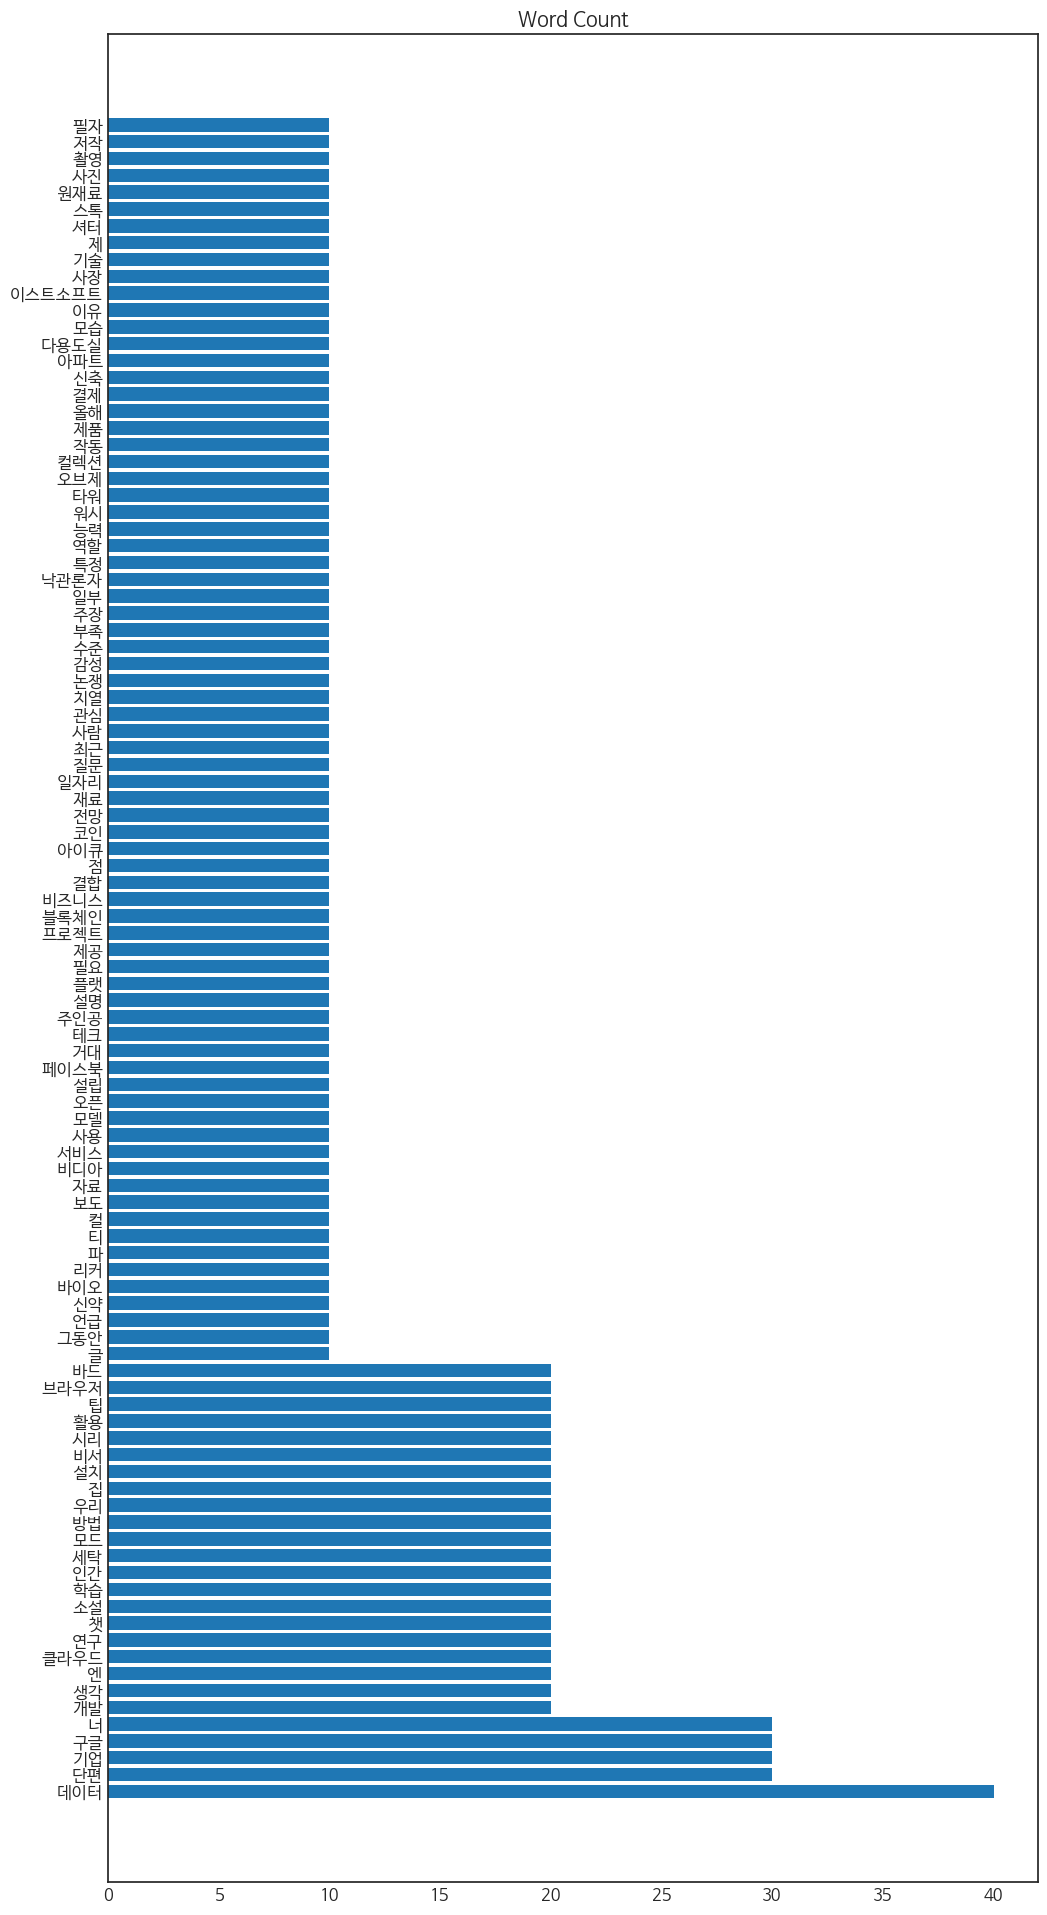

In [60]:
# 단어빈도 시각화

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')

font_path = 'C:\\Windows\\Fonts\\Hancom Gothic Bold.ttf'

font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_blog_nouns))

plt.figure(figsize=(12,24))
plt.barh(y_pos, top_blog_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_blog_nouns.keys())
plt.show()


<Axes: >

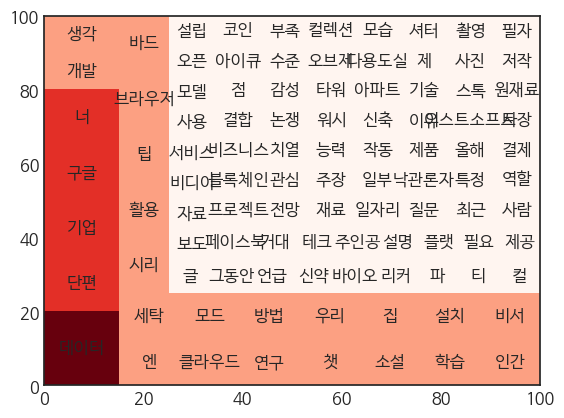

In [61]:
# 트리맵 시각화

norm = mpl.colors.Normalize(vmin=min(top_blog_nouns.values()),
                            vmax=max(top_blog_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_blog_nouns.values()]

squarify.plot(label=top_blog_nouns.keys(),
              sizes=top_blog_nouns.values(),
              color=colors)

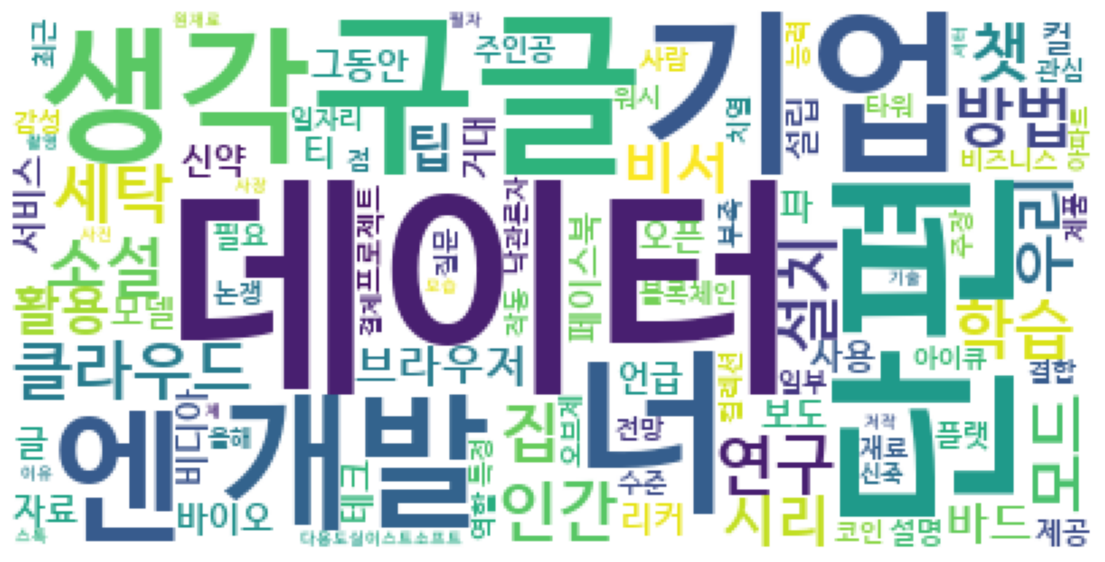

In [62]:
# 워드 클라우드 시각화
# 인공지능 뉴스에 나온 키워드 워드클라우드 시각화

wc = WordCloud(background_color = 'white', font_path='C:\\Windows\\Fonts\\Hancom Gothic Bold.ttf')

wc.generate_from_frequencies(top_blog_nouns)

figure = plt.figure(figsize=(14, 14))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()